# 扫描软件

## 切边

In [3]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
def imshow(img):
    img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
    plt.imshow(img)

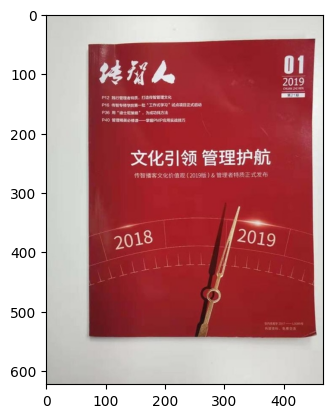

In [4]:
img = cv.imread("img/01_qiebian.jpg")
imshow(img)

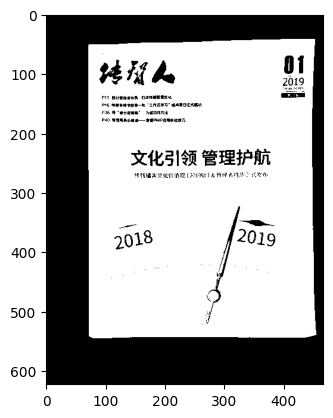

In [5]:
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
thresh,binary = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV | cv.THRESH_OTSU)
plt.imshow(binary,cmap="gray")

In [6]:
# 找出最大轮廓
contours,_ = cv.findContours(binary,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
cs = sorted(contours,key=lambda x:cv.contourArea(x),reverse=True)
len(cs)

1

In [7]:
maxContour = cs[0]

x,y,w,h = cv.boundingRect(maxContour)
x,y,w,h

(71, 42, 384, 504)

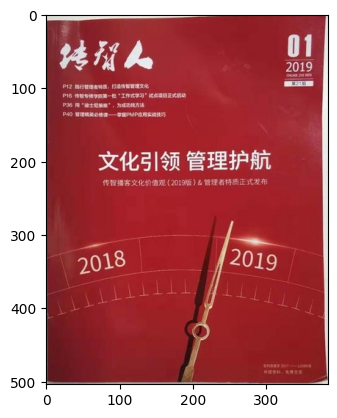

In [9]:
# 图片剪切
dst = img[y:y+h,x:x+w]
# print(dst)
imshow(dst)

## 旋转+切边

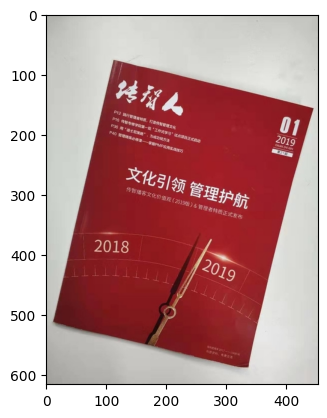

In [10]:
img = cv.imread("img/02_qiebian.jpg")
imshow(img)

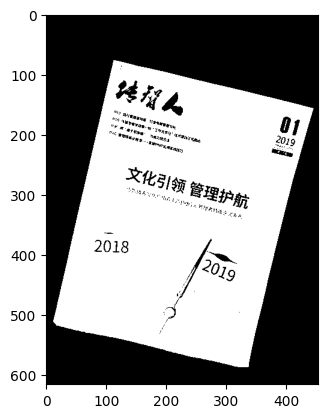

In [11]:
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
thresh,binary = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV | cv.THRESH_OTSU)
plt.imshow(binary,cmap="gray")

In [12]:
# 找出最大轮廓
contours,_ = cv.findContours(binary,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
cs = sorted(contours,key=lambda x:cv.contourArea(x),reverse=True)
len(cs)

1

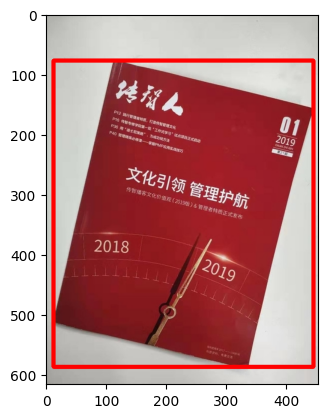

In [13]:
# 框出轮廓
rect = cv.boundingRect(cs[0])
dst = img.copy()
cv.rectangle(dst,rect,(0,0,255),5)
imshow(dst)

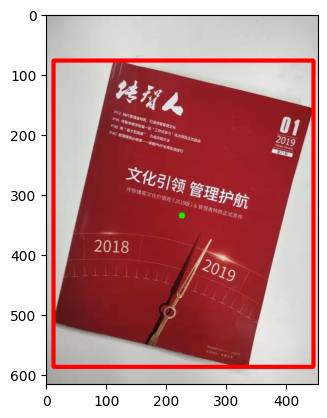

In [14]:
# 确定中心
center,shape,angle = cv.minAreaRect(cs[0])
cx = int(center[0])
cy = int(center[1])
cv.circle(dst,(cx,cy),5,(0,255,0),-1)
imshow(dst)

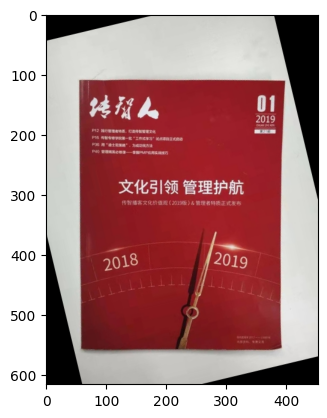

In [15]:
# 对图像进行旋转
M = cv.getRotationMatrix2D(center,angle,1)
height,width = img.shape[0:2]
rotation_img = cv.warpAffine(img,M,(width,height))
imshow(rotation_img)

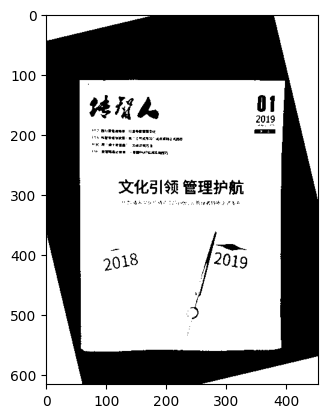

In [17]:
gray = cv.cvtColor(rotation_img,cv.COLOR_BGR2GRAY)
thresh,binary = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV | cv.THRESH_OTSU)
plt.imshow(binary,cmap="gray")

In [18]:
# 找出最大轮廓
contours,_ = cv.findContours(binary,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
cs = sorted(contours,key=lambda x:cv.contourArea(x),reverse=True)
len(cs)

5

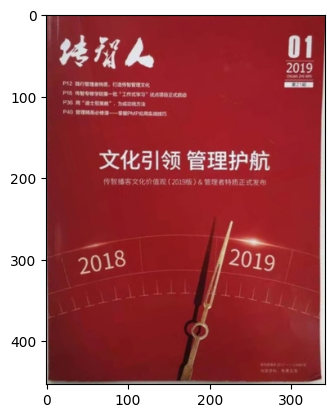

In [20]:
maxContour = cs[0]
# 求出它的包围矩形
x,y,w,h = cv.boundingRect(maxContour)   
# 图片剪切
dst = rotation_img[y:y+h,x:x+w]
# print(dst)
imshow(dst)

## 去除直线

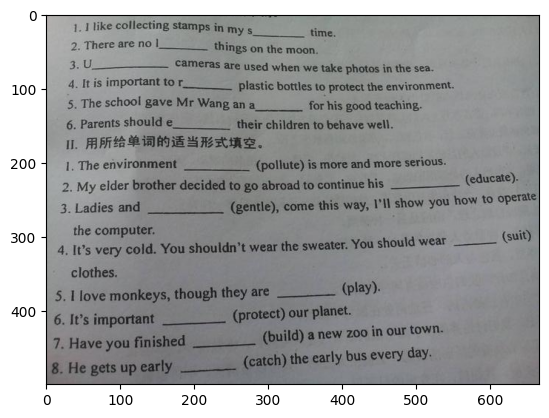

In [21]:
img = cv.imread("img/engline.jpg")
imshow(img)

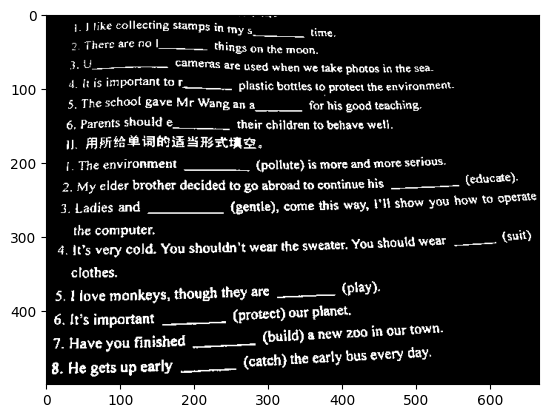

In [24]:
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
thresh,binary = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV | cv.THRESH_OTSU)
plt.imshow(binary,cmap="gray")

In [31]:
lines = cv.HoughLinesP(binary,1,np.pi/180,20,minLineLength=21,maxLineGap=1)
len(lines)

40

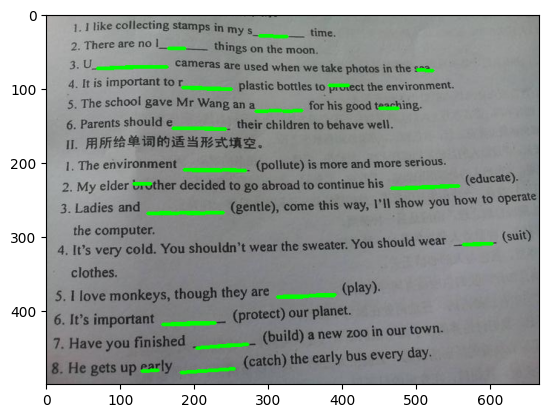

In [32]:
img_copy = img.copy()
for line in lines:
    x1,y1,x2,y2 = line[0]
    cv.line(img_copy,(x1,y1),(x2,y2),(0,255,0),3)
imshow(img_copy)

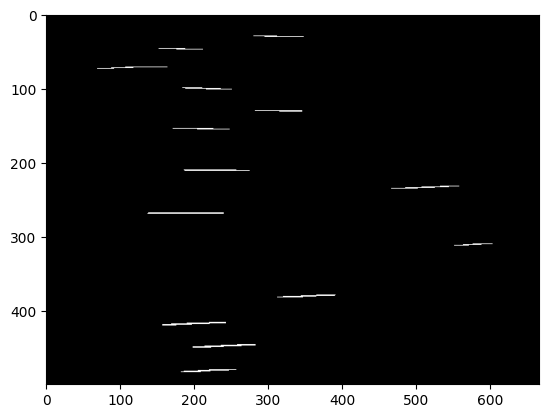

In [33]:
# 使用形态学变换
kernel = cv.getStructuringElement(cv.MORPH_RECT,(19,1))
# 使用开操作
dst = cv.morphologyEx(binary,cv.MORPH_OPEN,kernel)
imshow(dst)

In [34]:
lines = cv.HoughLinesP(dst,1,np.pi/180,20,minLineLength=21,maxLineGap=1)
len(lines)

26

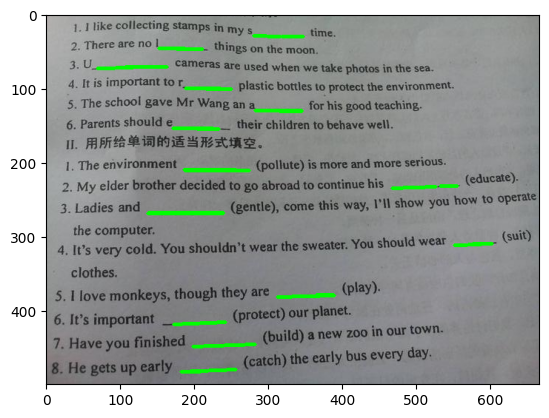

In [35]:
img_copy = img.copy()
for line in lines:
    x1,y1,x2,y2 = line[0]
    cv.line(img_copy,(x1,y1),(x2,y2),(0,255,0),3)
imshow(img_copy)